Importing all the libraries

In [12]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr, kendalltau
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
# read excel file
nba_df = pd.read_excel(r'/Users/abhishekshah/Desktop/Artificial Intelligence/Finalproject/AI Propject/NBA_Stats_71_Years.xlsx')

In [14]:
heart_df = pd.read_csv('/Users/abhishekshah/Desktop/Artificial Intelligence/Finalproject/AI Propject/heart.csv')

In [15]:
mcdonald_df =pd.read_csv('mcdonaldata.csv')

In [16]:
supercharge_df = pd.read_csv('supercharge.csv', encoding='latin1')

In [17]:
nba_df.head()

,Rank,Year,Season Start Year,Season Type,Player ID,Player,Team ID,Team,Games Played,Minutes Played,...,Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points Scored,Efficency,AST/TOV,STL/TOV
0,1,1951-52,1951,Regular Season,76056,Paul Arizin,1610612744,PHW,66,2939,...,745,170,NaN,NaN,NaN,250,1674,1786,NaN,NaN
1,2,1951-52,1951,Regular Season,600012,George Mikan,1610612747,MNL,64,2572,...,866,194,NaN,NaN,NaN,286,1523,1592,NaN,NaN
2,3,1951-52,1951,Regular Season,600003,Bob Cousy,1610612738,BOS,66,2681,...,421,441,NaN,NaN,NaN,190,1433,1322,NaN,NaN
3,4,1951-52,1951,Regular Season,77429,Ed Macauley,1610612738,BOS,66,2631,...,529,232,NaN,NaN,NaN,174,1264,1396,NaN,NaN
4,5,1951-52,1951,Regular Season,76514,Bob Davies,1610612758,ROC,65,2394,...,189,390,NaN,NaN,NaN,269,1052,935,NaN,NaN


In [18]:
# Get a summary of the dataset
print(nba_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33329 entries, 0 to 33328
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                33329 non-null  int64  
 1   Year                33329 non-null  object 
 2   Season Start Year   33329 non-null  int64  
 3   Season Type         33329 non-null  object 
 4   Player ID           33329 non-null  int64  
 5   Player              33329 non-null  object 
 6   Team ID             33329 non-null  int64  
 7   Team                33329 non-null  object 
 8   Games Played        33329 non-null  int64  
 9   Minutes Played      33329 non-null  int64  
 10  FG Made             33329 non-null  int64  
 11  FG Attempts         33329 non-null  int64  
 12  FG %                33329 non-null  float64
 13  3-Pt FG Made        27033 non-null  float64
 14  3-Pt FG Attempts    27033 non-null  float64
 15  3-Pt FG %           27033 non-null  float64
 16  FT M

In [19]:
# Check basic statistics of the numeric columns
print(nba_df.describe())

               Rank  Season Start Year     Player ID       Team ID  \
count  33329.000000       33329.000000  3.332900e+04  3.332900e+04   
mean     161.709322        1995.718953  2.082257e+05  1.610613e+09   
std      126.508479          18.247005  4.495152e+05  1.400733e+02   
min        1.000000        1951.000000  2.000000e+00  1.610610e+09   
25%       59.000000        1983.000000  1.559000e+03  1.610613e+09   
50%      130.000000        1998.000000  7.686100e+04  1.610613e+09   
75%      240.000000        2011.000000  2.007580e+05  1.610613e+09   
max      582.000000        2022.000000  1.641645e+06  1.610613e+09   

       Games Played  Minutes Played       FG Made   FG Attempts          FG %  \
count  33329.000000    33329.000000  33329.000000  33329.000000  33329.000000   
mean      40.082391      960.404423    157.218158    343.915059      0.430677   
std       30.295572      938.065045    182.051106    386.520808      0.122874   
min        1.000000        0.000000      0.00

In [20]:
# Identify columns with missing values
missing_values = nba_df.isnull().sum()
print(missing_values)

Rank                     0
Year                     0
Season Start Year        0
Season Type              0
Player ID                0
Player                   0
Team ID                  0
Team                     0
Games Played             0
Minutes Played           0
FG Made                  0
FG Attempts              0
FG %                     0
3-Pt FG Made          6296
3-Pt FG Attempts      6296
3-Pt FG %             6296
FT Made                  0
FT Attempts              0
FT %                     0
Offensive Rebounds    4229
Defensive Rebounds    4229
Rebounds                 0
Assists                  0
Steals                4229
Blocks                4229
Turnovers             5566
Personal Fouls           0
Points Scored            0
Efficency                0
AST/TOV               5566
STL/TOV               5566
dtype: int64


In [21]:
df_nba = nba_df.fillna(nba_df.mean())  # Fill missing values with the mean


/var/folders/r5/3bmqd5d91l7d11d1x39m82v00000gn/T/ipykernel_32475/2938365633.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_nba = nba_df.fillna(nba_df.mean())  # Fill missing values with the mean


In [22]:
missing_values = df_nba.isnull().sum()
print(missing_values)

Rank                  0
Year                  0
Season Start Year     0
Season Type           0
Player ID             0
Player                0
Team ID               0
Team                  0
Games Played          0
Minutes Played        0
FG Made               0
FG Attempts           0
FG %                  0
3-Pt FG Made          0
3-Pt FG Attempts      0
3-Pt FG %             0
FT Made               0
FT Attempts           0
FT %                  0
Offensive Rebounds    0
Defensive Rebounds    0
Rebounds              0
Assists               0
Steals                0
Blocks                0
Turnovers             0
Personal Fouls        0
Points Scored         0
Efficency             0
AST/TOV               0
STL/TOV               0
dtype: int64


For this project, we will be focusing on Points Scored which will be predicting or analyzing the scoring performance of players so the "Points Scored" column could be a suitable target variable. It represents the total number of points a player has scored. But before we do that we will be doing some EDA.

In [23]:
df_nba.Team.unique()

array(['PHW', 'MNL', 'BOS', 'ROC', 'FTW', 'BAL', 'NYK', 'INO', 'SYR',
       'MIH', 'STL', 'DET', 'CIN', 'LAL', 'CHP', 'SFW', 'CHZ', 'BLT',
       'PHL', 'CHI', 'SEA', 'SDR', 'PHX', 'ATL', 'MIL', 'POR', 'BUF',
       'CLE', 'HOU', 'GOS', 'KCK', 'CAP', 'WAS', 'NOJ', 'DEN', 'IND',
       'SAN', 'NYN', 'NJN', 'SDC', 'UTH', 'DAL', 'LAC', 'SAC', 'CHH',
       'MIA', 'MIN', 'ORL', 'TOR', 'VAN', 'UTA', 'GSW', 'PHI', 'SAS',
       'MEM', 'NOH', 'CHA', 'NOK', 'OKC', 'BKN', 'NOP'], dtype=object)

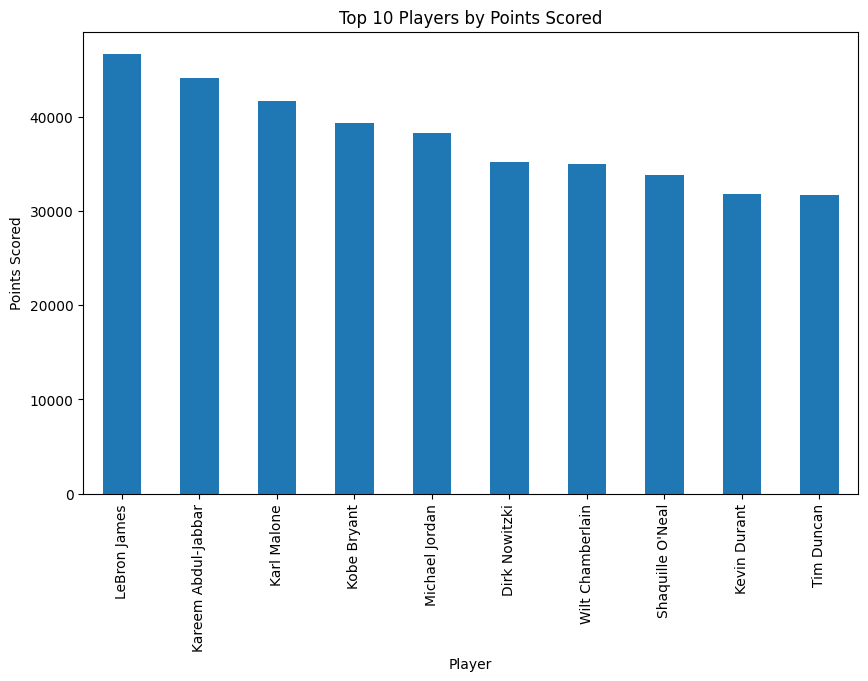

In [24]:
# Bar plot
plt.figure(figsize=(10,6))
df_nba.groupby('Player')['Points Scored'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Players by Points Scored')
plt.xlabel('Player')
plt.ylabel('Points Scored')
plt.show()

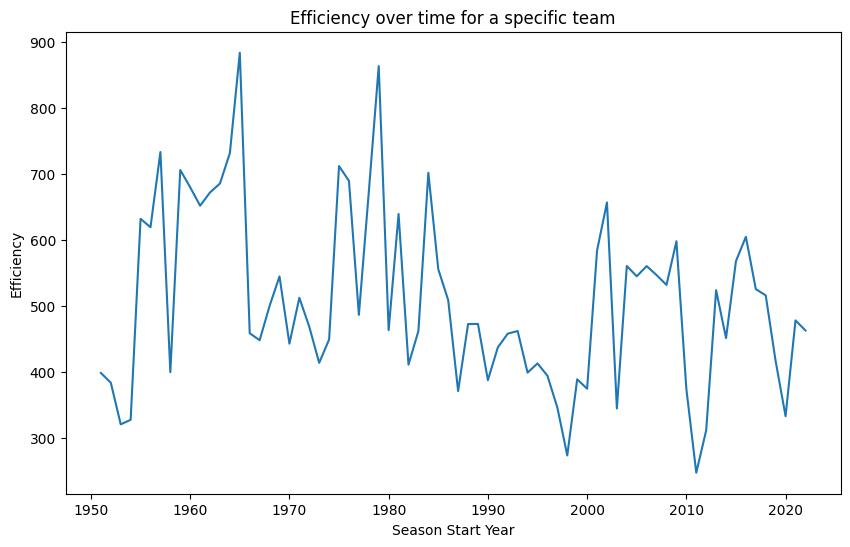

In [25]:
# Line plot for NYK
plt.figure(figsize=(10,6))
df_nba[df_nba['Team']=='NYK'].groupby('Season Start Year')['Efficency'].mean().plot(kind='line')
plt.title('Efficiency over time for a specific team')
plt.xlabel('Season Start Year')
plt.ylabel('Efficiency')
plt.show()

/Users/abhishekshah/opt/anaconda3/envs/tensor/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Figure size 1000x600 with 0 Axes>

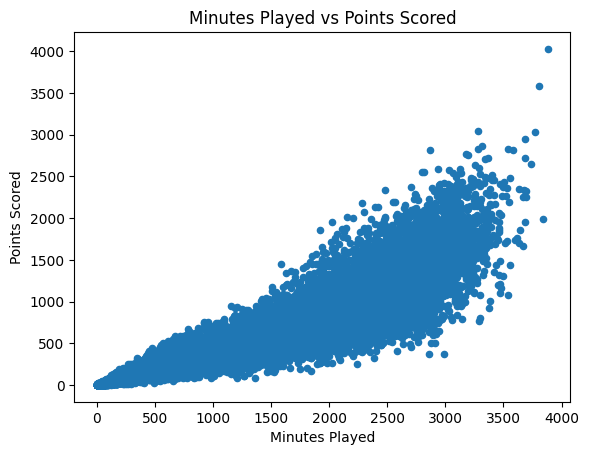

In [26]:
# Scatter plot
plt.figure(figsize=(10,6))
df_nba.plot(kind='scatter', x='Minutes Played', y='Points Scored')
plt.title('Minutes Played vs Points Scored')
plt.xlabel('Minutes Played')
plt.ylabel('Points Scored')
plt.show()


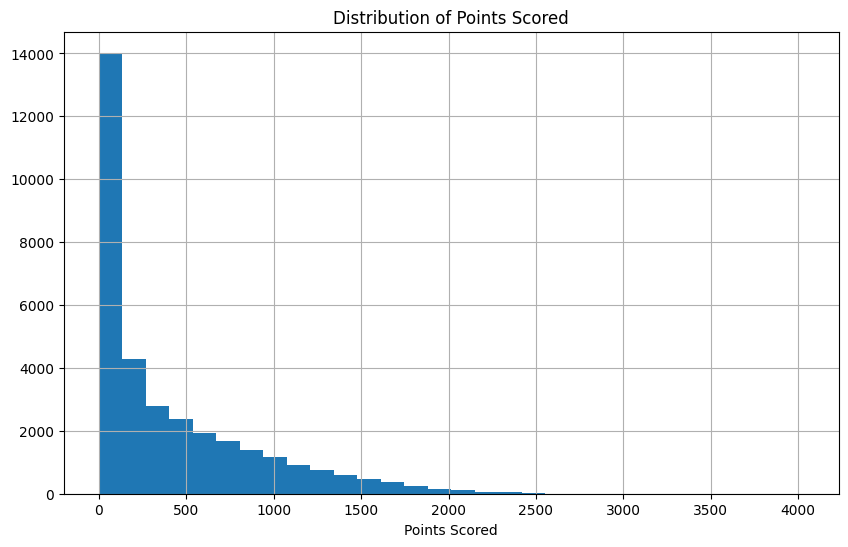

In [27]:
# Histogram
plt.figure(figsize=(10,6))
df_nba['Points Scored'].hist(bins=30)
plt.title('Distribution of Points Scored')
plt.xlabel('Points Scored')
plt.show()

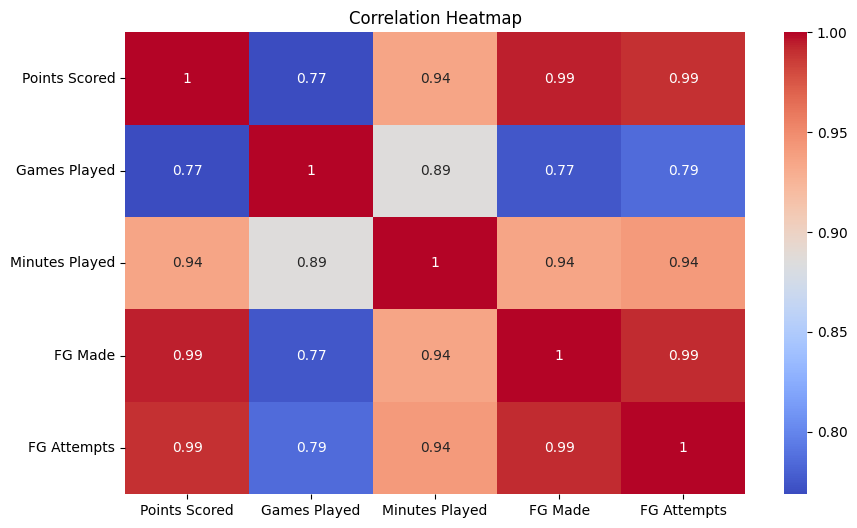

In [28]:
# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_nba[['Points Scored', 'Games Played', 'Minutes Played', 'FG Made', 'FG Attempts']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

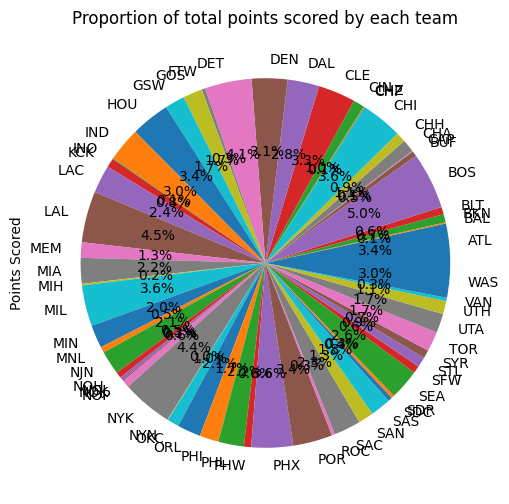

In [29]:
# Pie chart
plt.figure(figsize=(10,6))
df_nba.groupby('Team')['Points Scored'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of total points scored by each team')
plt.show()

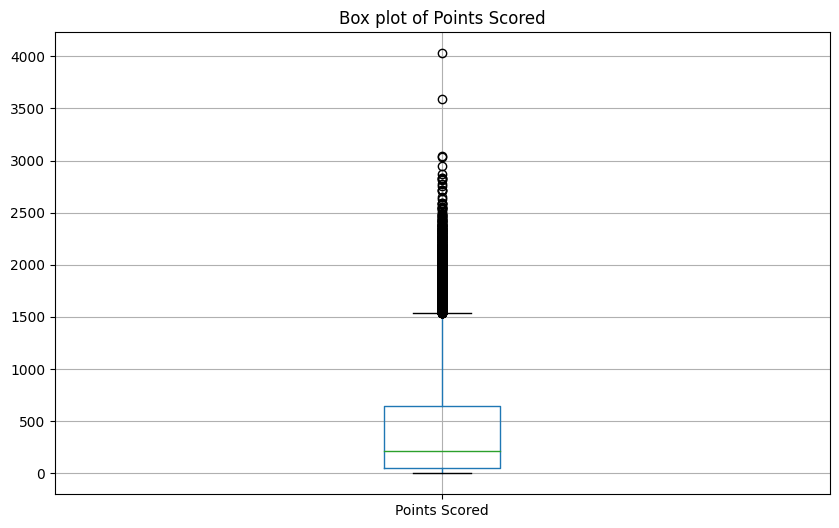

In [30]:
# Box plot
plt.figure(figsize=(10,6))
df_nba.boxplot(column='Points Scored')
plt.title('Box plot of Points Scored')
plt.show()

For this project, we will be focusing on Points Scored which will be predicting or analyzing the scoring performance of players so the "Points Scored" column could be a suitable target variable. It represents the total number of points a player has scored.

In [31]:
df_nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33329 entries, 0 to 33328
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                33329 non-null  int64  
 1   Year                33329 non-null  object 
 2   Season Start Year   33329 non-null  int64  
 3   Season Type         33329 non-null  object 
 4   Player ID           33329 non-null  int64  
 5   Player              33329 non-null  object 
 6   Team ID             33329 non-null  int64  
 7   Team                33329 non-null  object 
 8   Games Played        33329 non-null  int64  
 9   Minutes Played      33329 non-null  int64  
 10  FG Made             33329 non-null  int64  
 11  FG Attempts         33329 non-null  int64  
 12  FG %                33329 non-null  float64
 13  3-Pt FG Made        33329 non-null  float64
 14  3-Pt FG Attempts    33329 non-null  float64
 15  3-Pt FG %           33329 non-null  float64
 16  FT M

In [32]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Initiate label encoder
le = LabelEncoder()

# Label encoding for high cardinality columns
nba_df['Player'] = le.fit_transform(nba_df['Player'])
nba_df['Team'] = le.fit_transform(nba_df['Team'])

# One-hot encoding for low cardinality columns
onehotencoder = OneHotEncoder(drop='first')  # drop='first' to avoid dummy variable trap

# Perform one-hot encoding and convert it to array
season_type_encoded = onehotencoder.fit_transform(nba_df[['Season Type']]).toarray()

# Get unique values of 'Season Type' except the first one (as drop='first')
column_names = nba_df['Season Type'].unique()[1:]

# Convert to DataFrame
season_type_df = pd.DataFrame(season_type_encoded, columns=column_names)

# Drop original 'Season Type' column and merge the one-hot encoded dataframe
nba_df = nba_df.drop('Season Type', axis=1)
nba_df = pd.concat([nba_df, season_type_df], axis=1)


Perform z-score standardization on the dataset

In [33]:
nba_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33329 entries, 0 to 33328
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                33329 non-null  int64  
 1   Year                33329 non-null  object 
 2   Season Start Year   33329 non-null  int64  
 3   Player ID           33329 non-null  int64  
 4   Player              33329 non-null  int64  
 5   Team ID             33329 non-null  int64  
 6   Team                33329 non-null  int64  
 7   Games Played        33329 non-null  int64  
 8   Minutes Played      33329 non-null  int64  
 9   FG Made             33329 non-null  int64  
 10  FG Attempts         33329 non-null  int64  
 11  FG %                33329 non-null  float64
 12  3-Pt FG Made        27033 non-null  float64
 13  3-Pt FG Attempts    27033 non-null  float64
 14  3-Pt FG %           27033 non-null  float64
 15  FT Made             33329 non-null  int64  
 16  FT A

In [34]:
nba_df = nba_df.drop('Year',axis=1)

In [35]:
scaler = StandardScaler()
df_standardized_nba = pd.DataFrame(scaler.fit_transform(nba_df), columns=nba_df.columns)

In [36]:
pearson_corr = df_standardized_nba.corr()
spearman_corr = df_standardized_nba.corr(method='spearman')
kendall_corr = df_standardized_nba.corr(method='kendall')


In [37]:
print(pearson_corr)

                        Rank  Season Start Year  Player ID    Player  \
Rank                1.000000           0.396881   0.249001  0.019890   
Season Start Year   0.396881           1.000000   0.422391  0.044464   
Player ID           0.249001           0.422391   1.000000  0.011696   
Player              0.019890           0.044464   0.011696  1.000000   
Team ID             0.043277           0.126388   0.015720  0.020602   
Team                0.006161          -0.004082  -0.017154 -0.013926   
Games Played       -0.182062          -0.055336  -0.073438  0.000363   
Minutes Played     -0.408815          -0.076044  -0.091033 -0.001742   
FG Made            -0.460261          -0.092153  -0.073690  0.003115   
FG Attempts        -0.461612          -0.107114  -0.076585  0.002883   
FG %               -0.164452           0.052682  -0.006123 -0.004981   
3-Pt FG Made       -0.273397           0.280643   0.105003  0.010075   
3-Pt FG Attempts   -0.277247           0.285141   0.111493  0.00

Performance and Ranking: There are negative correlations between the "Rank" column and several other columns such as "Games Played," "Minutes Played," "FG Made," "FG Attempts," "Points Scored," and "Efficiency." This suggests that as the ranking increases, these performance-related metrics tend to decrease. It indicates that higher-ranked players may have lower game time, fewer field goals made, and lower overall efficiency.

Season and Performance: The "Season Start Year" column has positive correlations with several other columns such as "Games Played," "Minutes Played," "FG Made," "FG Attempts," "Points Scored," and "Efficiency." This suggests that as the years progress, players tend to participate in more games, accumulate more minutes, make more field goals, score more points, and potentially improve their efficiency.

Playoff Performance: The "Playoffs" column shows positive correlations with several columns such as "Rank," "Games Played," "Minutes Played," "FG Made," "FG Attempts," "Points Scored," and "Efficiency." This indicates that players who perform well in terms of games played, minutes played, field goals made, points scored, and efficiency have a higher chance of making it to the playoffs.

Free Throw Shooting: The "FT %" column shows positive correlations with "FT Made" and "FT Attempts." This suggests that as players make more free throws and attempt more free throws, their free throw shooting percentage tends to increase.

In [38]:
print(spearman_corr)

                        Rank  Season Start Year  Player ID    Player  \
Rank                1.000000           0.366051   0.113269  0.024394   
Season Start Year   0.366051           1.000000   0.348041  0.035069   
Player ID           0.113269           0.348041   1.000000  0.014784   
Player              0.024394           0.035069   0.014784  1.000000   
Team ID             0.040682           0.049669  -0.011800 -0.003662   
Team                0.005817          -0.002404  -0.038562 -0.010748   
Games Played       -0.155019          -0.066508  -0.060414  0.000475   
Minutes Played     -0.363109          -0.061203  -0.076208 -0.003386   
FG Made            -0.419760          -0.072385  -0.052980  0.000147   
FG Attempts        -0.415949          -0.082355  -0.052702  0.000522   
FG %               -0.190876           0.033856  -0.030368 -0.005050   
3-Pt FG Made       -0.243651           0.329931   0.133583  0.015128   
3-Pt FG Attempts   -0.253077           0.306917   0.129469  0.01

In [39]:
print(kendall_corr)

                        Rank  Season Start Year  Player ID    Player  \
Rank                1.000000           0.256050   0.075533  0.016260   
Season Start Year   0.256050           1.000000   0.240740  0.023346   
Player ID           0.075533           0.240740   1.000000  0.010180   
Player              0.016260           0.023346   0.010180  1.000000   
Team ID             0.027548           0.034230  -0.008186 -0.002595   
Team                0.003822          -0.002194  -0.025510 -0.007298   
Games Played       -0.136069          -0.043795  -0.041250  0.000314   
Minutes Played     -0.291428          -0.041035  -0.050990 -0.002266   
FG Made            -0.348857          -0.048631  -0.035510  0.000072   
FG Attempts        -0.345830          -0.055309  -0.035266  0.000314   
FG %               -0.130001           0.023629  -0.020648 -0.003322   
3-Pt FG Made       -0.176265           0.234842   0.093375  0.010631   
3-Pt FG Attempts   -0.177802           0.210889   0.087760  0.01

Based on the Kendall correlation matrix, here are a few inferences that can be drawn:

Playoff Performance: There is a positive correlation between "Playoffs" and metrics such as "Rank," "Games Played," "Minutes Played," "FG Made," "FG Attempts," "FT Made," "FT Attempts," and "Points Scored." This suggests that players who rank higher, participate in more games, accumulate more playing minutes, make more field goals and free throws, and score more points are more likely to be part of playoff teams.

Performance Metrics: Several performance-related metrics, such as "FG Made," "FG Attempts," "FT Made," "FT Attempts," "Points Scored," and "Efficency," show positive correlations with each other. This implies that players who have higher field goal and free throw numbers, score more points, and have higher efficiency tend to perform better overall.

Rebounding: Metrics like "Offensive Rebounds," "Defensive Rebounds," and "Rebounds" show positive correlations with each other. This indicates that players who excel in offensive and defensive rebounding also tend to have higher overall rebounding numbers.

Assists and Turnovers: There is a positive correlation between "Assists" and "Turnovers." This suggests that players who have more assists also tend to have more turnovers.

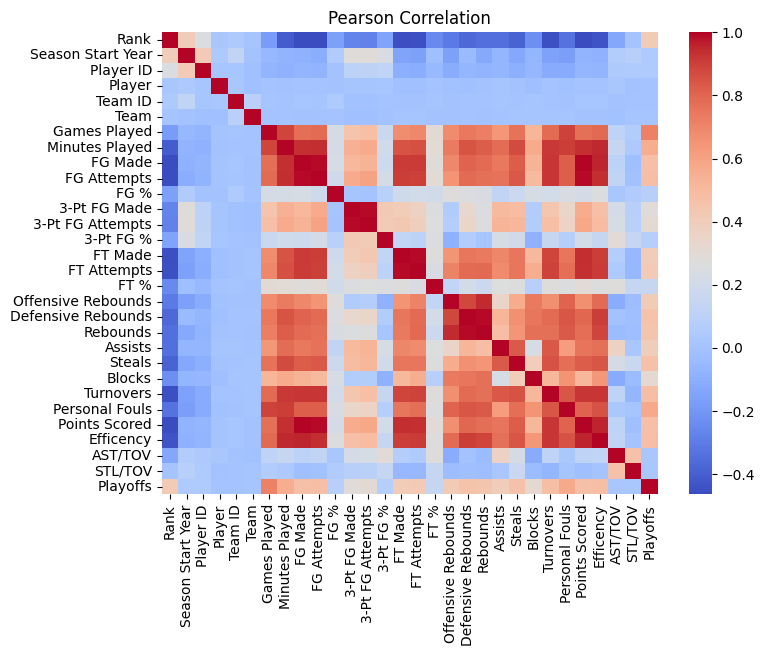

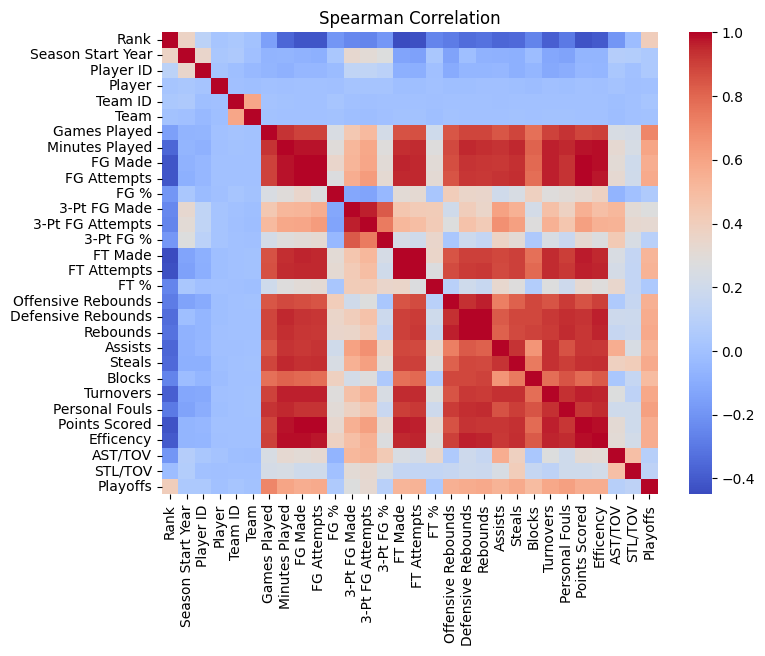

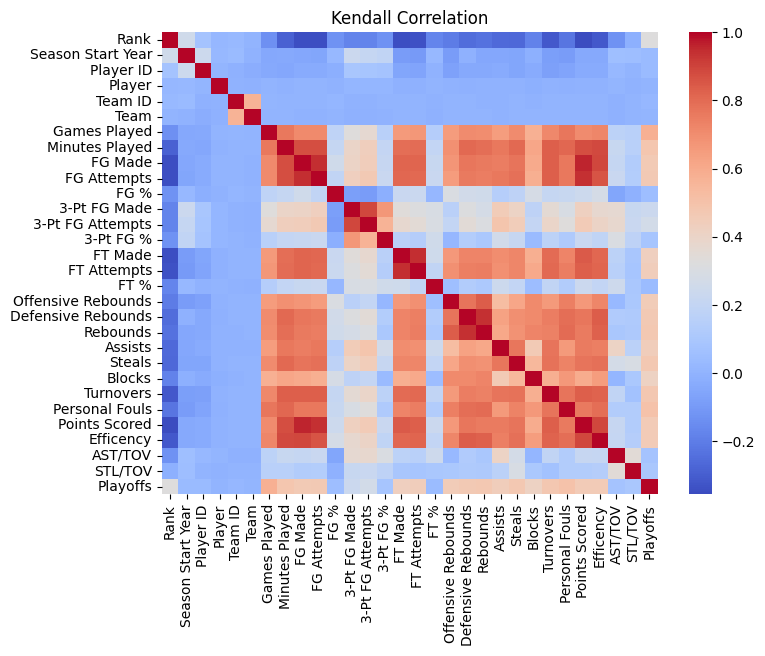

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the Pearson correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(pearson_corr, cmap='coolwarm')
plt.title('Pearson Correlation')
plt.show()

# Plot the Spearman correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr, cmap='coolwarm')
plt.title('Spearman Correlation')
plt.show()

# Plot the Kendall correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(kendall_corr, cmap='coolwarm')
plt.title('Kendall Correlation')
plt.show()


Let's look at Heart Dataframe

In [41]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [42]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [43]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [44]:
# Identify columns with missing values
missing_values = heart_df.isnull().sum()
print(missing_values)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


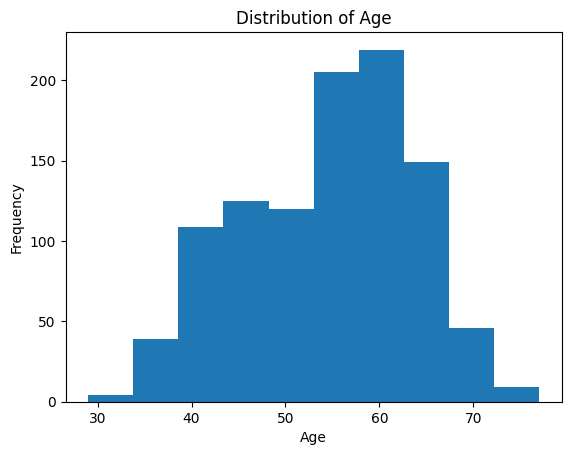

In [45]:
import matplotlib.pyplot as plt

heart_df['age'].plot.hist(bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()


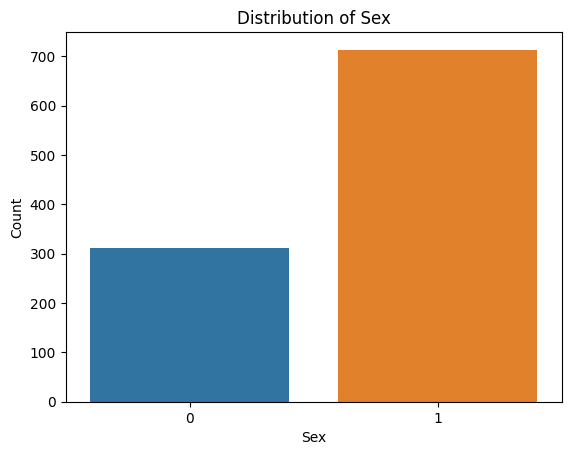

In [46]:
import seaborn as sns

sns.countplot(x='sex', data=heart_df)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex')
plt.show()


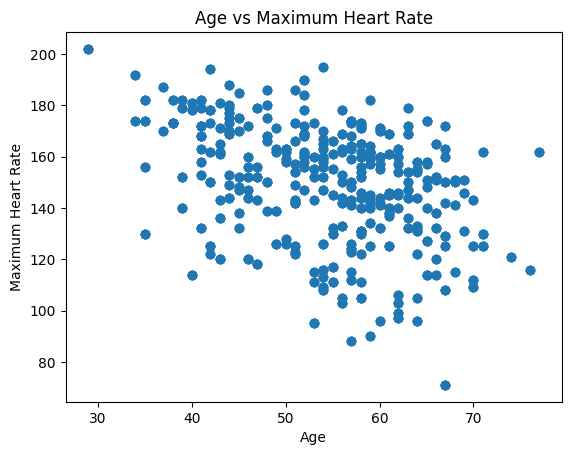

In [47]:
plt.scatter(heart_df['age'], heart_df['thalach'])
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.title('Age vs Maximum Heart Rate')
plt.show()


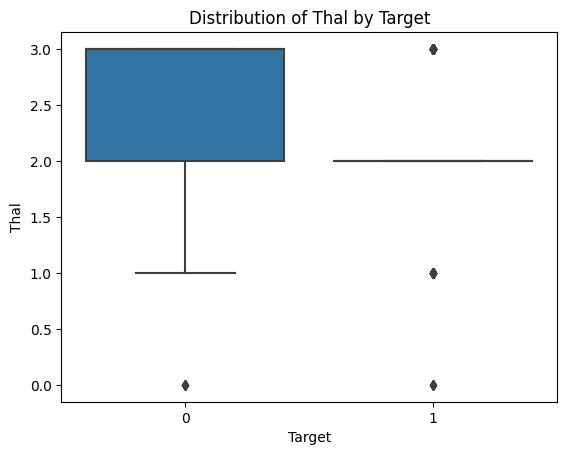

In [48]:
sns.boxplot(x='target', y='thal', data=heart_df)
plt.xlabel('Target')
plt.ylabel('Thal')
plt.title('Distribution of Thal by Target')
plt.show()



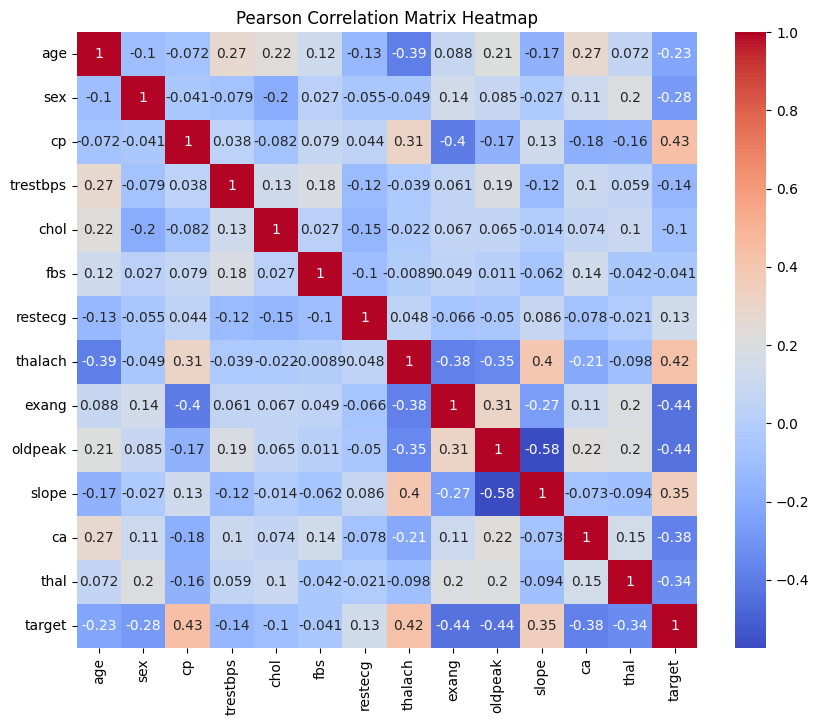

In [49]:
correlation_matrix_pearson = heart_df.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_pearson, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Matrix Heatmap')
plt.show()


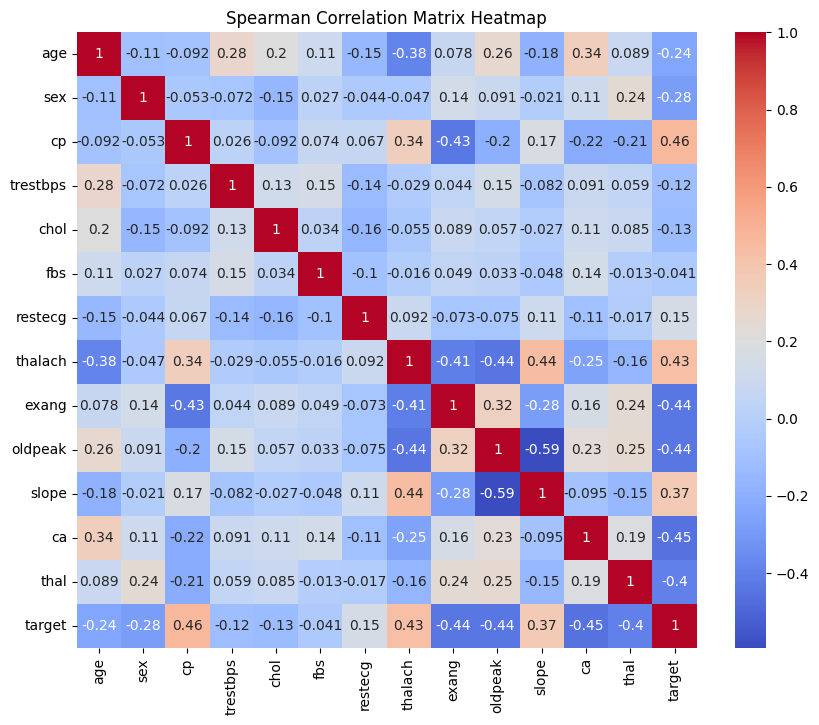

In [50]:
#Spearman corelation
correlation_matrix_spearman = heart_df.corr(method='spearman')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_spearman, annot=True, cmap='coolwarm')
plt.title('Spearman Correlation Matrix Heatmap')
plt.show()


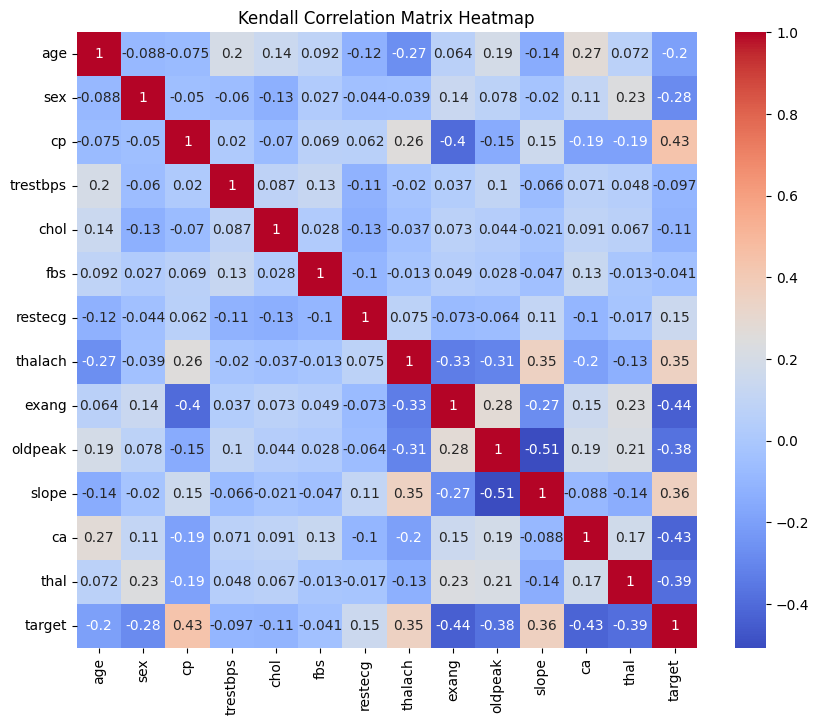

In [51]:
correlation_matrix_kendall = heart_df.corr(method='kendall')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_kendall, annot=True, cmap='coolwarm')
plt.title('Kendall Correlation Matrix Heatmap')
plt.show()


In [52]:
print(correlation_matrix_pearson)

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.103240 -0.071966  0.271121  0.219823  0.121243   
sex      -0.103240  1.000000 -0.041119 -0.078974 -0.198258  0.027200   
cp       -0.071966 -0.041119  1.000000  0.038177 -0.081641  0.079294   
trestbps  0.271121 -0.078974  0.038177  1.000000  0.127977  0.181767   
chol      0.219823 -0.198258 -0.081641  0.127977  1.000000  0.026917   
fbs       0.121243  0.027200  0.079294  0.181767  0.026917  1.000000   
restecg  -0.132696 -0.055117  0.043581 -0.123794 -0.147410 -0.104051   
thalach  -0.390227 -0.049365  0.306839 -0.039264 -0.021772 -0.008866   
exang     0.088163  0.139157 -0.401513  0.061197  0.067382  0.049261   
oldpeak   0.208137  0.084687 -0.174733  0.187434  0.064880  0.010859   
slope    -0.169105 -0.026666  0.131633 -0.120445 -0.014248 -0.061902   
ca        0.271551  0.111729 -0.176206  0.104554  0.074259  0.137156   
thal      0.072297  0.198424 -0.163341  0.059276  0.100244 -0.04

Based on the Pearson correlation coefficients, we can make the following inferences:

Age (in years) has a negative correlation (-0.229) with the target
variable, indicating that older individuals may be more likely to have heart disease.
Sex has a negative correlation (-0.280) with the target variable, suggesting that females may have a lower likelihood of heart disease compared to males.
Chest pain type (cp) has a positive correlation (0.435) with the target variable, indicating that certain types of chest pain may be associated with a higher probability of heart disease.
Maximum heart rate achieved (thalach) has a positive correlation (0.423) with the target variable, suggesting that individuals with higher maximum heart rates may be more likely to have heart disease.
Exercise-induced angina (exang) has a negative correlation (-0.438) with the target variable, indicating that individuals who experience angina during exercise may have a lower likelihood of heart disease.
ST depression induced by exercise relative to rest (oldpeak) has a negative correlation (-0.438) with the target variable, suggesting that a higher degree of ST depression may be associated with a higher probability of heart disease.
The number of major vessels colored by fluoroscopy (ca) has a negative correlation (-0.382) with the target variable, indicating that a higher number of colored vessels may be associated with a lower likelihood of heart disease.
The thalassemia category (thal) has a negative correlation (-0.338) with the target variable, suggesting that certain categories of thalassemia may be associated with a lower probability of heart disease.

Let's look at the mcdonald's Dataframe

In [53]:
mcdonald_df.head()

,Unnamed: 0,item,servesize,calories,protien,totalfat,satfat,transfat,cholestrol,carbs,sugar,addedsugar,sodium,menu
0,0,McVeggie Burger,168,402,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13,regular
1,1,McAloo Tikki Burger,146,339,8.50,11.31,4.27,0.20,1.47,5.27,7.05,4.07,545.34,regular
2,2,McSpicy Paneer Burger,199,652,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58,regular
3,3,Spicy Paneer Wrap,250,674,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46,regular
4,4,American Veg Burger,177,512,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24,regular


In [54]:
mcdonald_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  141 non-null    int64  
 1   item        141 non-null    object 
 2   servesize   141 non-null    object 
 3   calories    141 non-null    object 
 4   protien     141 non-null    float64
 5   totalfat    141 non-null    float64
 6   satfat      141 non-null    float64
 7   transfat    141 non-null    float64
 8   cholestrol  141 non-null    float64
 9   carbs       141 non-null    float64
 10  sugar       141 non-null    float64
 11  addedsugar  141 non-null    float64
 12  sodium      141 non-null    float64
 13  menu        141 non-null    object 
dtypes: float64(9), int64(1), object(4)
memory usage: 15.5+ KB


In [55]:
# Convert servesize and calories to numeric
mcdonald_df['servesize'] = pd.to_numeric(mcdonald_df['servesize'], errors='coerce')
mcdonald_df['calories'] = pd.to_numeric(mcdonald_df['calories'], errors='coerce')

# Convert menu to binary
mcdonald_df['menu'] = mcdonald_df['menu'].map({'No': 0, 'Yes': 1})


In [56]:
mcdonald_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  141 non-null    int64  
 1   item        141 non-null    object 
 2   servesize   73 non-null     float64
 3   calories    134 non-null    float64
 4   protien     141 non-null    float64
 5   totalfat    141 non-null    float64
 6   satfat      141 non-null    float64
 7   transfat    141 non-null    float64
 8   cholestrol  141 non-null    float64
 9   carbs       141 non-null    float64
 10  sugar       141 non-null    float64
 11  addedsugar  141 non-null    float64
 12  sodium      141 non-null    float64
 13  menu        0 non-null      float64
dtypes: float64(12), int64(1), object(1)
memory usage: 15.5+ KB


In [57]:
# Identify columns with missing values
missing_values = mcdonald_df.isnull().sum()
print(missing_values)

Unnamed: 0      0
item            0
servesize      68
calories        7
protien         0
totalfat        0
satfat          0
transfat        0
cholestrol      0
carbs           0
sugar           0
addedsugar      0
sodium          0
menu          141
dtype: int64


In [58]:
import numpy as np

# Impute missing values in servesize with mean
mean_servesize = np.mean(mcdonald_df['servesize'])
mcdonald_df['servesize'].fillna(mean_servesize, inplace=True)

# Drop the menu column
mcdonald_df.drop('menu', axis=1, inplace=True)


In [59]:
mcdonald_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  141 non-null    int64  
 1   item        141 non-null    object 
 2   servesize   141 non-null    float64
 3   calories    134 non-null    float64
 4   protien     141 non-null    float64
 5   totalfat    141 non-null    float64
 6   satfat      141 non-null    float64
 7   transfat    141 non-null    float64
 8   cholestrol  141 non-null    float64
 9   carbs       141 non-null    float64
 10  sugar       141 non-null    float64
 11  addedsugar  141 non-null    float64
 12  sodium      141 non-null    float64
dtypes: float64(11), int64(1), object(1)
memory usage: 14.4+ KB


Performing some EDA on this.

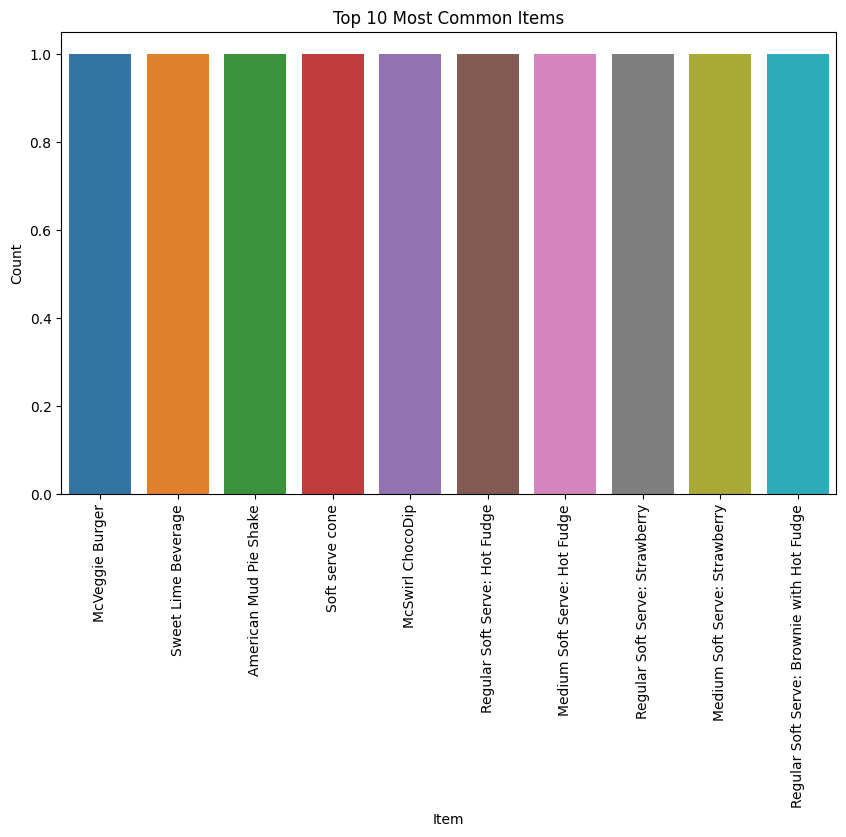

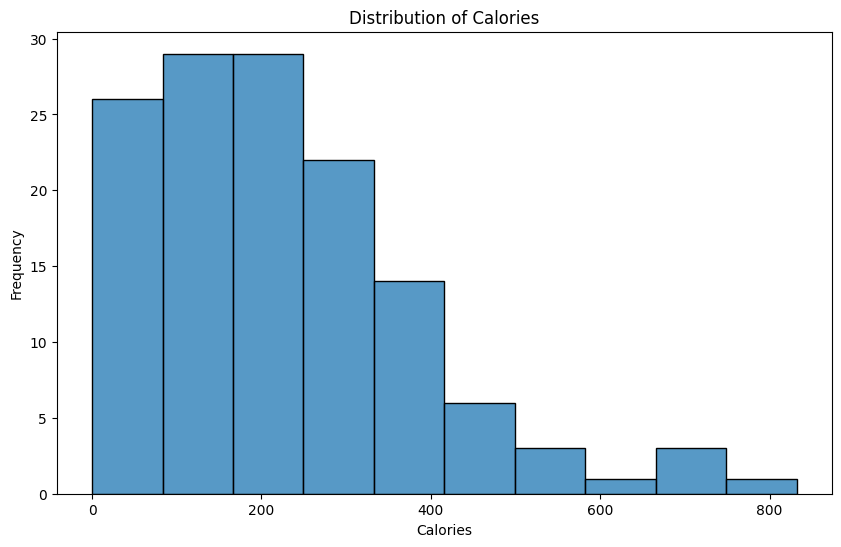

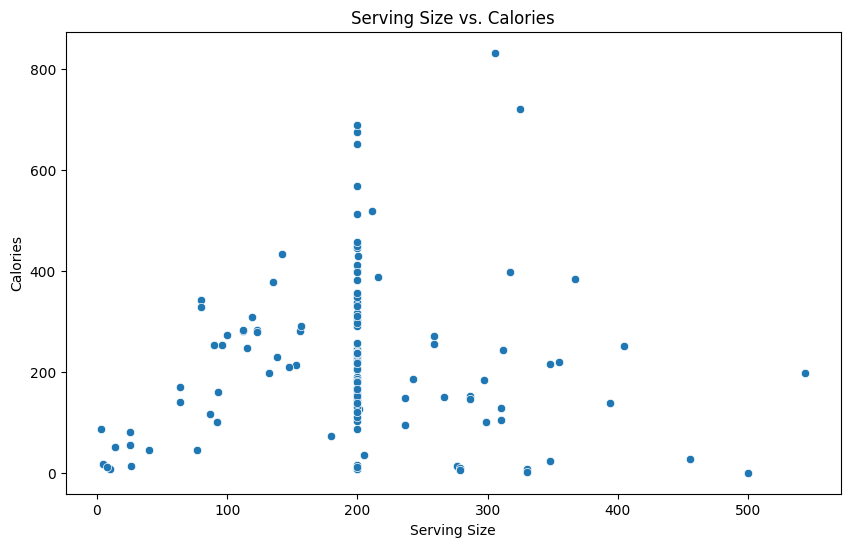

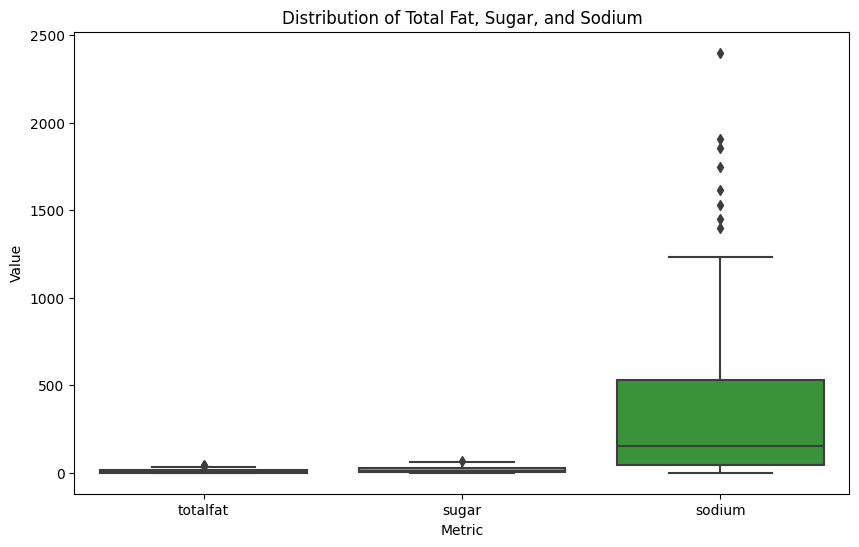

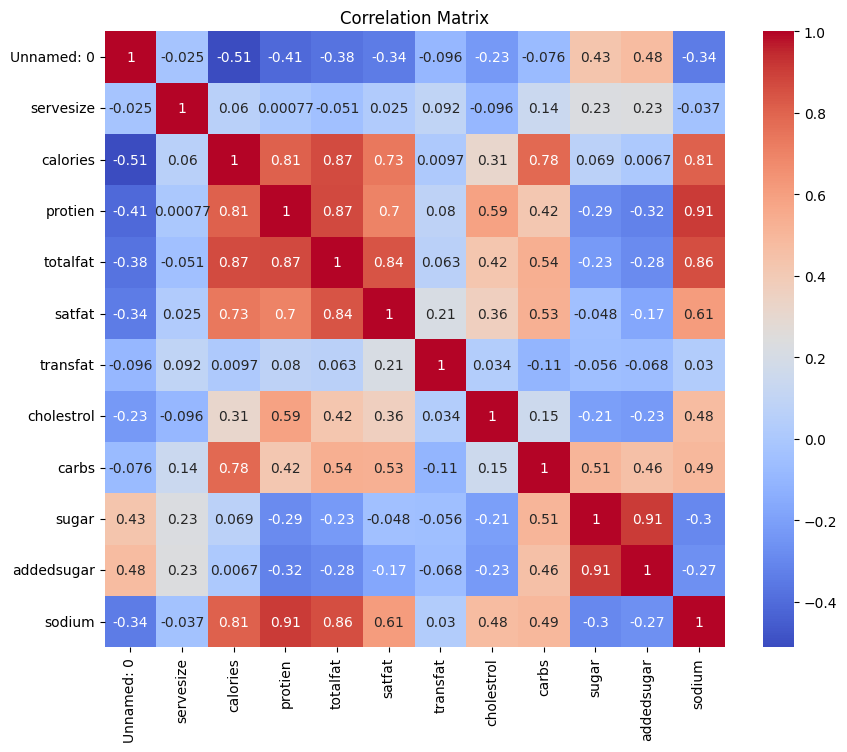

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar Chart
# Filter the DataFrame to include only the top 10 items by count
top_10_items = mcdonald_df['item'].value_counts().nlargest(10).index

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.countplot(data=mcdonald_df[mcdonald_df['item'].isin(top_10_items)], x='item')
plt.xticks(rotation=90)
plt.xlabel('Item')
plt.ylabel('Count')
plt.title('Top 10 Most Common Items')
plt.show()

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=mcdonald_df, x='calories', bins=10)
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.title('Distribution of Calories')
plt.show()

# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mcdonald_df, x='servesize', y='calories')
plt.xlabel('Serving Size')
plt.ylabel('Calories')
plt.title('Serving Size vs. Calories')
plt.show()

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=mcdonald_df[['totalfat', 'sugar', 'sodium']])
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Distribution of Total Fat, Sugar, and Sodium')
plt.show()

# Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = mcdonald_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



In [61]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Select the columns to be scaled (excluding non-numeric columns if any)
columns_to_scale = ['servesize', 'calories', 'protien', 'totalfat', 'satfat', 'transfat', 'cholestrol', 'carbs', 'sugar', 'addedsugar', 'sodium']

# Fit the scaler on the selected columns
scaler.fit(mcdonald_df[columns_to_scale])

# Transform the selected columns using the fitted scaler
mcdonald_df[columns_to_scale] = scaler.transform(mcdonald_df[columns_to_scale])


In [62]:
mcdonald_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  141 non-null    int64  
 1   item        141 non-null    object 
 2   servesize   141 non-null    float64
 3   calories    134 non-null    float64
 4   protien     141 non-null    float64
 5   totalfat    141 non-null    float64
 6   satfat      141 non-null    float64
 7   transfat    141 non-null    float64
 8   cholestrol  141 non-null    float64
 9   carbs       141 non-null    float64
 10  sugar       141 non-null    float64
 11  addedsugar  141 non-null    float64
 12  sodium      141 non-null    float64
dtypes: float64(11), int64(1), object(1)
memory usage: 14.4+ KB


In [63]:
mcdonald_df.head()

,Unnamed: 0,item,servesize,calories,protien,totalfat,satfat,transfat,cholestrol,carbs,sugar,addedsugar,sodium
0,0,McVeggie Burger,3.150668e-16,1.095803,0.330632,0.362522,0.069642,-0.130092,-0.475016,1.251442,-0.480814,-0.410813,0.720888
1,1,McAloo Tikki Burger,3.150668e-16,0.711344,0.121178,0.120177,-0.149589,-0.124608,-0.495347,-1.238413,-0.535237,-0.440322,0.383161
2,2,McSpicy Paneer Burger,3.150668e-16,2.621434,1.540406,2.826367,2.483231,-0.127350,-0.089121,1.046990,-0.452001,-0.356009,1.494787
3,3,Spicy Paneer Wrap,3.150668e-16,2.755690,1.621058,2.792708,3.017991,-0.116382,0.291192,1.384021,-0.762534,-0.650403,1.521841
4,4,American Veg Burger,3.150668e-16,1.767081,0.939732,1.287666,1.128917,-0.128721,-0.021550,1.271839,-0.484015,-0.391842,1.445764


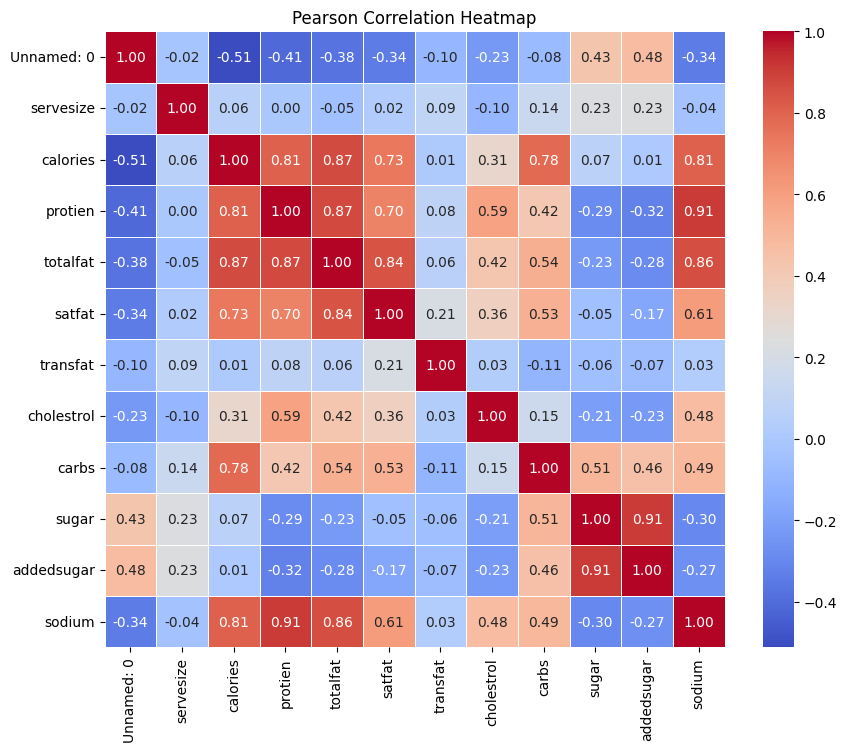

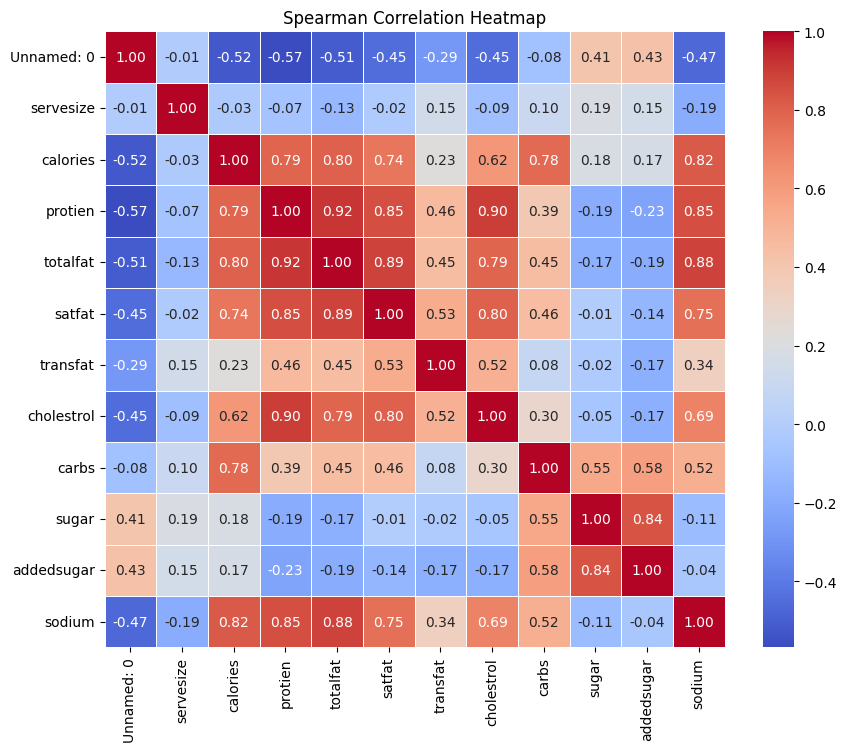

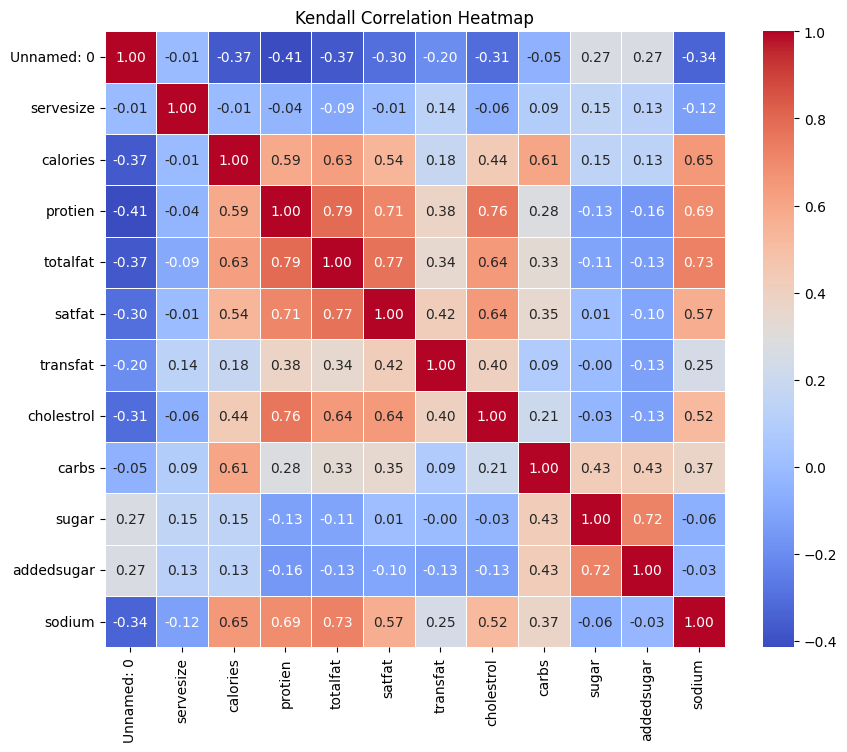

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate Pearson correlation matrix
pearson_corr = mcdonald_df.corr(method='pearson')

# Calculate Spearman correlation matrix
spearman_corr = mcdonald_df.corr(method='spearman')

# Calculate Kendall correlation matrix
kendall_corr = mcdonald_df.corr(method='kendall')

# Plot Pearson correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Pearson Correlation Heatmap')
plt.show()

# Plot Spearman correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Spearman Correlation Heatmap')
plt.show()

# Plot Kendall correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(kendall_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Kendall Correlation Heatmap')
plt.show()


In [65]:
print(pearson_corr)

            Unnamed: 0  servesize  calories   protien  totalfat    satfat  \
Unnamed: 0    1.000000  -0.024761 -0.512600 -0.407651 -0.376072 -0.342279   
servesize    -0.024761   1.000000  0.060222  0.000766 -0.051029  0.024942   
calories     -0.512600   0.060222  1.000000  0.808778  0.869628  0.734729   
protien      -0.407651   0.000766  0.808778  1.000000  0.871684  0.701758   
totalfat     -0.376072  -0.051029  0.869628  0.871684  1.000000  0.844072   
satfat       -0.342279   0.024942  0.734729  0.701758  0.844072  1.000000   
transfat     -0.096239   0.091579  0.009678  0.079694  0.062986  0.212726   
cholestrol   -0.230396  -0.096424  0.309260  0.590339  0.421340  0.362520   
carbs        -0.076254   0.140113  0.782388  0.415551  0.535279  0.531387   
sugar         0.432428   0.230255  0.068850 -0.287476 -0.226667 -0.047899   
addedsugar    0.477586   0.232814  0.006704 -0.319260 -0.282666 -0.174590   
sodium       -0.343108  -0.037403  0.809915  0.909905  0.859849  0.614493   

Based on the correlation matrix, we can make the following inferences:

Calories and macronutrients: There is a strong positive correlation between calories and protein (0.81), total fat (0.87), and saturated fat (0.73). This suggests that items with higher calorie content tend to have higher levels of protein, total fat, and saturated fat.

Cholesterol: Cholesterol shows a moderate positive correlation with protein (0.59), total fat (0.42), and sodium (0.48). This indicates that items with higher cholesterol content also tend to have higher levels of protein, total fat, and sodium.

Carbohydrates and sugar: Carbohydrates exhibit a positive correlation with calories (0.78) and a moderate positive correlation with sugar (0.51) and added sugar (0.46). This implies that items with higher carbohydrate content also tend to have higher levels of calories, sugar, and added sugar.

Sodium: Sodium has a strong positive correlation with protein (0.91), total fat (0.86), and saturated fat (0.61). This suggests that items with higher sodium content also tend to have higher levels of protein, total fat, and saturated fat.

These inferences provide insights into the relationships between different nutritional components in the McDonald's dataset. It is important to note that correlation does not imply causation, and further analysis may be required to establish any causal relationships.

In [66]:
supercharge_df.head()

,Supercharger,Street Address,City,State,Zip,Country,Stalls,kW,GPS,Elev(m),Open Date,Unnamed: 11
0,"Buellton, CA",555 McMurray Rd,Buellton,CA,93427,USA,10,150.0,"34.61456, -120.188387",114,7/13/2013,NaN
1,"Corning, CA",950 Hwy 99,Corning,CA,96021,USA,6,150.0,"39.926454, -122.198393",87,10/18/2013,NaN
2,"Barstow, CA",2812 Lenwood Rd,Barstow,CA,92311,USA,16,150.0,"34.849129, -117.085446",725,11/19/2012,NaN
3,"Tifton, GA",1310 U.S. 82,Tifton,GA,31794,USA,8,150.0,"31.448847, -83.53221",92,7/10/2014,NaN
4,"Roseville, CA",1151 Galleria Blvd,Roseville,CA,95678,USA,7,150.0,"38.771208, -121.266149",66,4/29/2014,NaN


In [67]:
supercharge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5876 entries, 0 to 5875
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Supercharger    5876 non-null   object 
 1   Street Address  5876 non-null   object 
 2   City            5876 non-null   object 
 3   State           5754 non-null   object 
 4   Zip             3947 non-null   object 
 5   Country         5876 non-null   object 
 6   Stalls          5876 non-null   int64  
 7   kW              5870 non-null   float64
 8   GPS             5876 non-null   object 
 9   Elev(m)         5876 non-null   int64  
 10  Open Date       5126 non-null   object 
 11  Unnamed: 11     0 non-null      float64
dtypes: float64(2), int64(2), object(8)
memory usage: 551.0+ KB


In [68]:
!pip install geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 9.6 MB/s eta 0:00:0000:01m00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 15.3 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.6/18.6 MB 11.0 MB/s eta 0:00:0000:0100:01


/var/folders/r5/3bmqd5d91l7d11d1x39m82v00000gn/T/ipykernel_32475/437513469.py:16: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


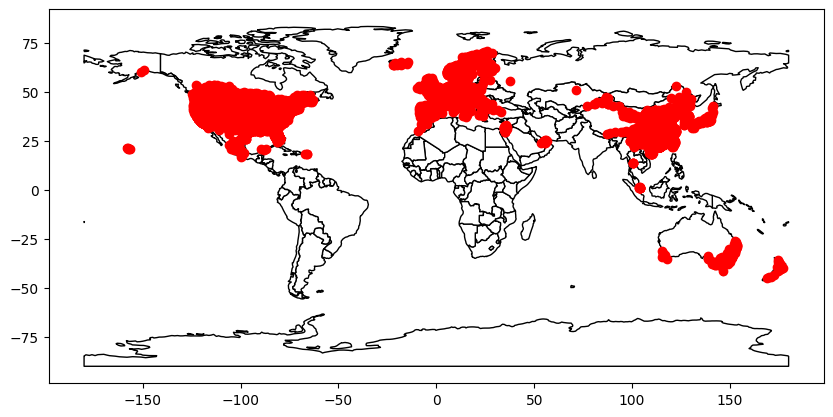

In [69]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# First, we need to split the GPS coordinates into separate latitude and longitude fields
supercharge_df[['Latitude', 'Longitude']] = supercharge_df['GPS'].str.split(',', expand=True)

# Convert them to float
supercharge_df['Latitude'] = pd.to_numeric(supercharge_df['Latitude'])
supercharge_df['Longitude'] = pd.to_numeric(supercharge_df['Longitude'])

# Create a GeoDataFrame from your DataFrame. The 'points_from_xy' function creates Point objects from the latitude and longitude columns
gdf = gpd.GeoDataFrame(supercharge_df, geometry=gpd.points_from_xy(supercharge_df['Longitude'], supercharge_df['Latitude']))

# Load a basemap
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the data
fig, ax = plt.subplots(figsize=(10,10))
world.plot(ax=ax, color='white', edgecolor='black')
gdf.plot(ax=ax, color='red')
plt.show()



In [70]:
supercharge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5876 entries, 0 to 5875
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Supercharger    5876 non-null   object 
 1   Street Address  5876 non-null   object 
 2   City            5876 non-null   object 
 3   State           5754 non-null   object 
 4   Zip             3947 non-null   object 
 5   Country         5876 non-null   object 
 6   Stalls          5876 non-null   int64  
 7   kW              5870 non-null   float64
 8   GPS             5876 non-null   object 
 9   Elev(m)         5876 non-null   int64  
 10  Open Date       5126 non-null   object 
 11  Unnamed: 11     0 non-null      float64
 12  Latitude        5876 non-null   float64
 13  Longitude       5876 non-null   float64
dtypes: float64(4), int64(2), object(8)
memory usage: 642.8+ KB


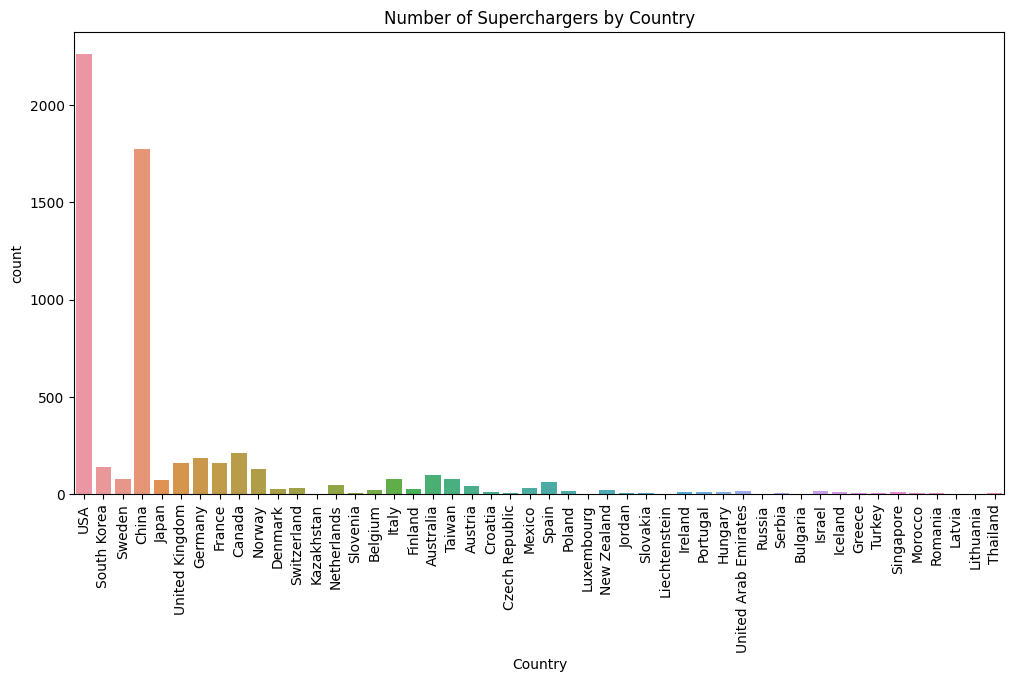

In [71]:
#Bar plot of the number of Superchargers in each country:
plt.figure(figsize=(12, 6))
sns.countplot(data=supercharge_df, x='Country')
plt.title('Number of Superchargers by Country')
plt.xticks(rotation=90) # Rotate labels for better readability if needed
plt.show()

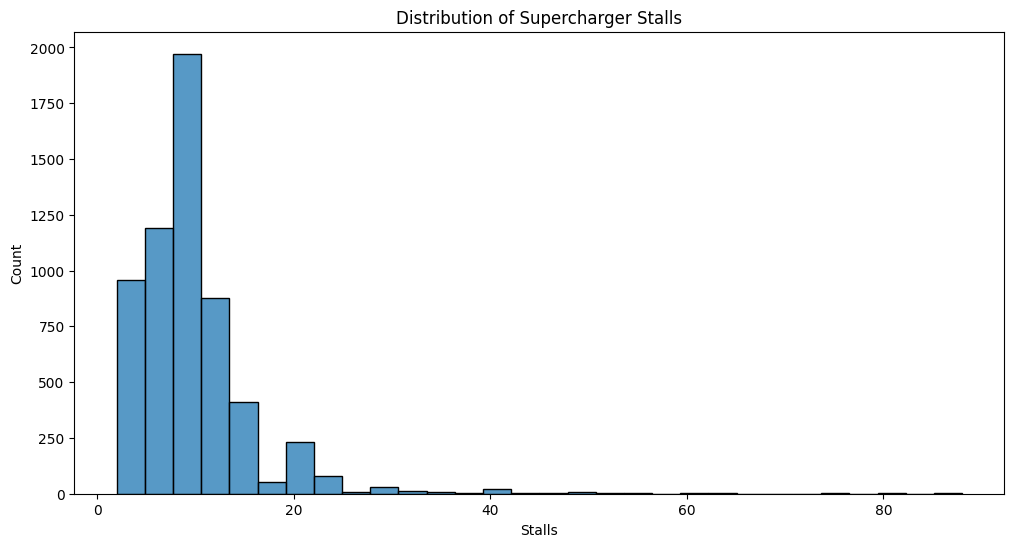

In [72]:
#Distribution of Supercharger stalls:
plt.figure(figsize=(12, 6))
sns.histplot(data=supercharge_df, x='Stalls', bins=30)
plt.title('Distribution of Supercharger Stalls')
plt.show()


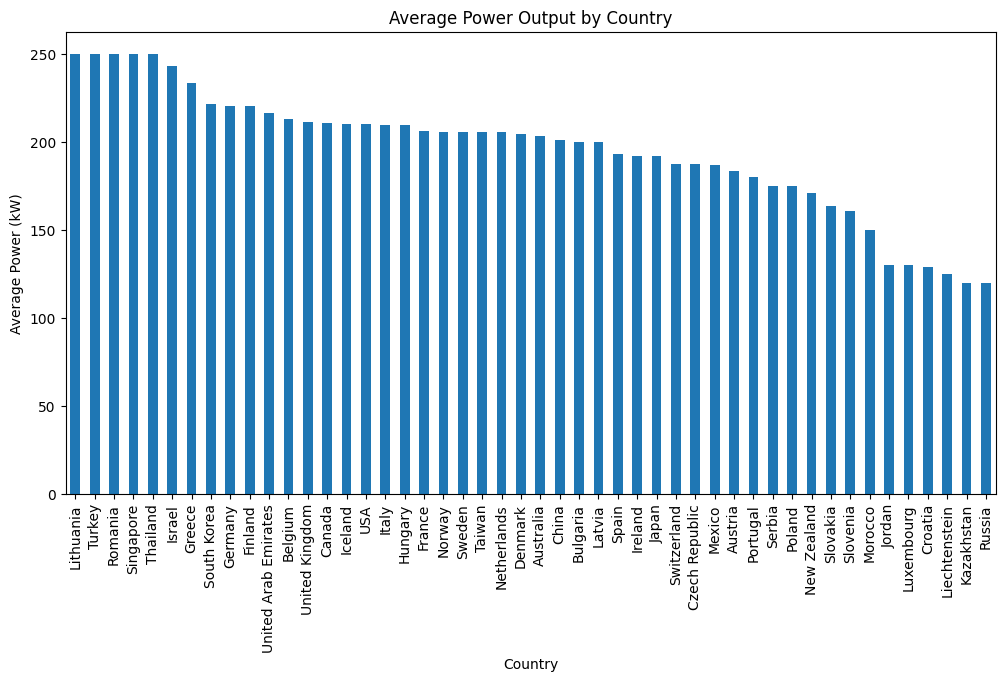

In [73]:
#Average power output by country (kW):
avg_power = supercharge_df.groupby('Country')['kW'].mean().sort_values(ascending=False)
avg_power.plot(kind='bar', figsize=(12, 6))
plt.title('Average Power Output by Country')
plt.ylabel('Average Power (kW)')
plt.show()


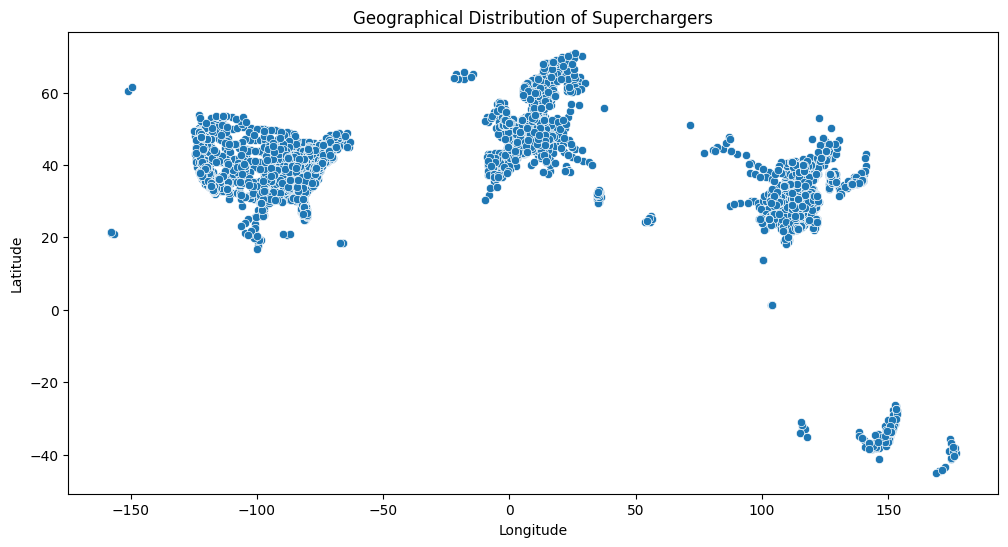

In [74]:
#Scatter plot of the Supercharger's latitude and longitude (this gives an idea of geographical distribution):
plt.figure(figsize=(12, 6))
sns.scatterplot(data=supercharge_df, x='Longitude', y='Latitude')
plt.title('Geographical Distribution of Superchargers')
plt.show()


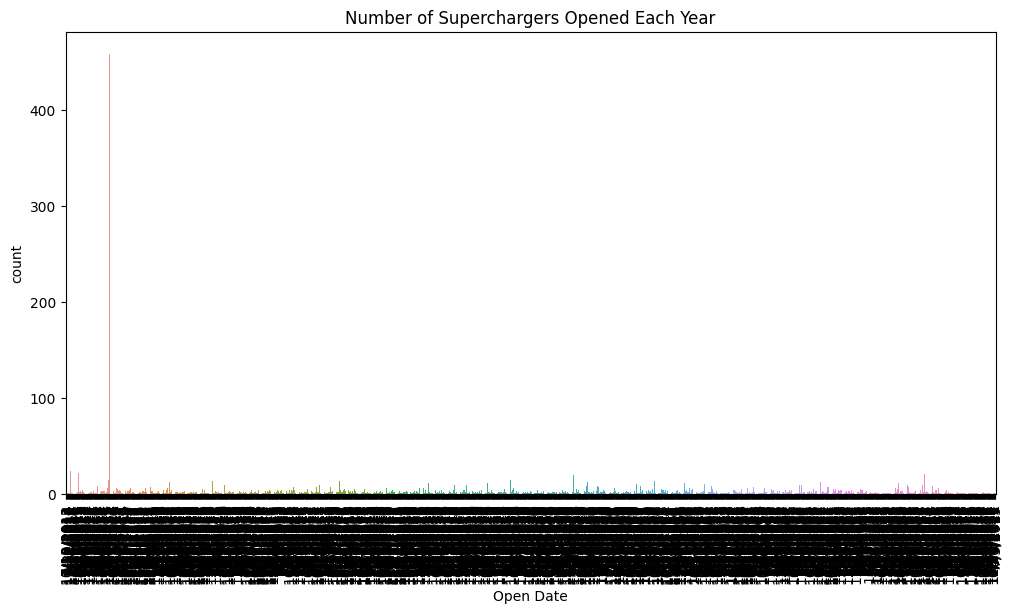

In [75]:
#Number of Superchargers opened each year:
plt.figure(figsize=(12, 6))
sns.countplot(data=supercharge_df, x='Open Date')
plt.title('Number of Superchargers Opened Each Year')
plt.xticks(rotation=90) # Rotate labels for better readability if needed
plt.show()


In [76]:

from sklearn.preprocessing import LabelEncoder

# Let's first deal with the NaNs for the 'State' and 'Zip' columns
supercharge_df['State'] = supercharge_df['State'].fillna('Unknown')
supercharge_df['Zip'] = supercharge_df['Zip'].fillna('Unknown')

# Convert 'Latitude' and 'Longitude' to integers
supercharge_df['Latitude'] = supercharge_df['Latitude'].astype(int)
supercharge_df['Longitude'] = supercharge_df['Longitude'].astype(int)

# Let's deal with the date now, we'll just take the year as an integer
supercharge_df['Open Date'] = pd.to_datetime(supercharge_df['Open Date']).dt.year

# Fill NaN years with 0
supercharge_df['Open Date'] = supercharge_df['Open Date'].fillna(0).astype(int)

# For the kW column, let's fill NaNs with the average and convert to int
supercharge_df['kW'] = supercharge_df['kW'].fillna(supercharge_df['kW'].mean()).astype(int)

# Drop columns which will not be used
supercharge_df = supercharge_df.drop(['Unnamed: 11', 'GPS'], axis=1)

# Initialize the LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to categorical columns
for column in supercharge_df.select_dtypes(include=['object']).columns:
    supercharge_df[column] = le.fit_transform(supercharge_df[column])


In [77]:
supercharge_df.head()

,Supercharger,Street Address,City,State,Zip,Country,Stalls,kW,Elev(m),Open Date,Latitude,Longitude
0,673,2202,393,52,2845,45,10,150,114,2013,34,-120
1,1149,2874,631,52,3037,45,6,150,87,2013,39,-122
2,297,1440,197,52,2768,45,16,150,725,2012,34,-117
3,5072,490,2960,105,885,45,8,150,92,2014,31,-83
4,4063,324,2496,52,3011,45,7,150,66,2014,38,-121


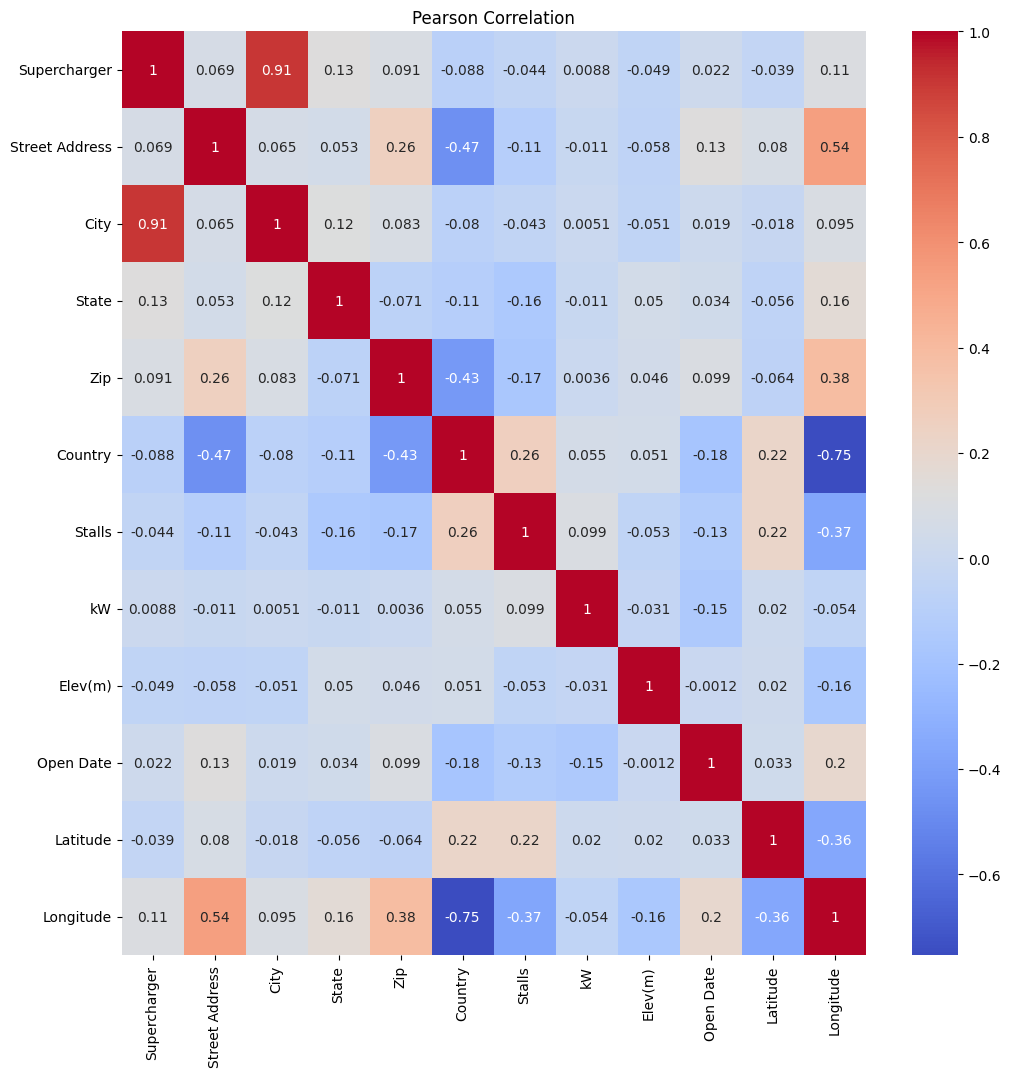

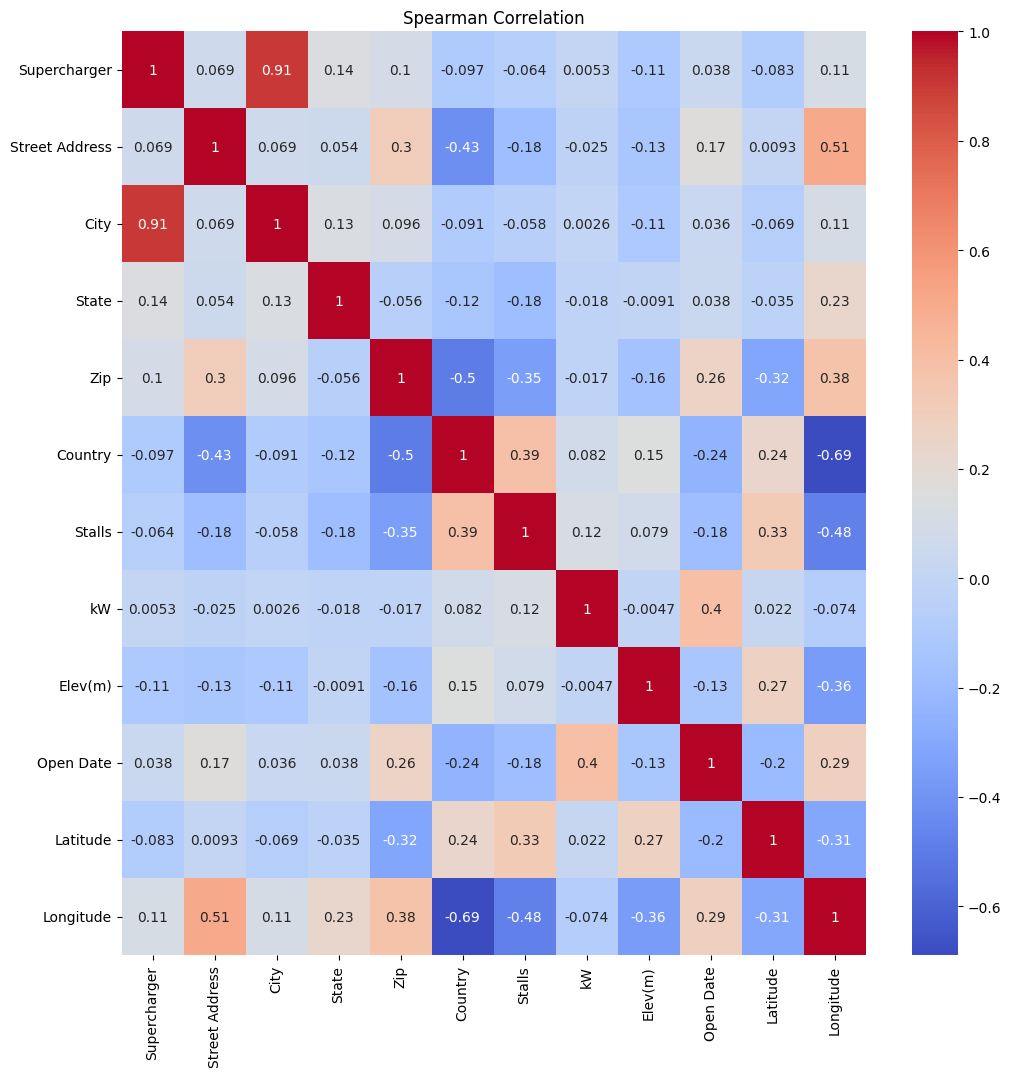

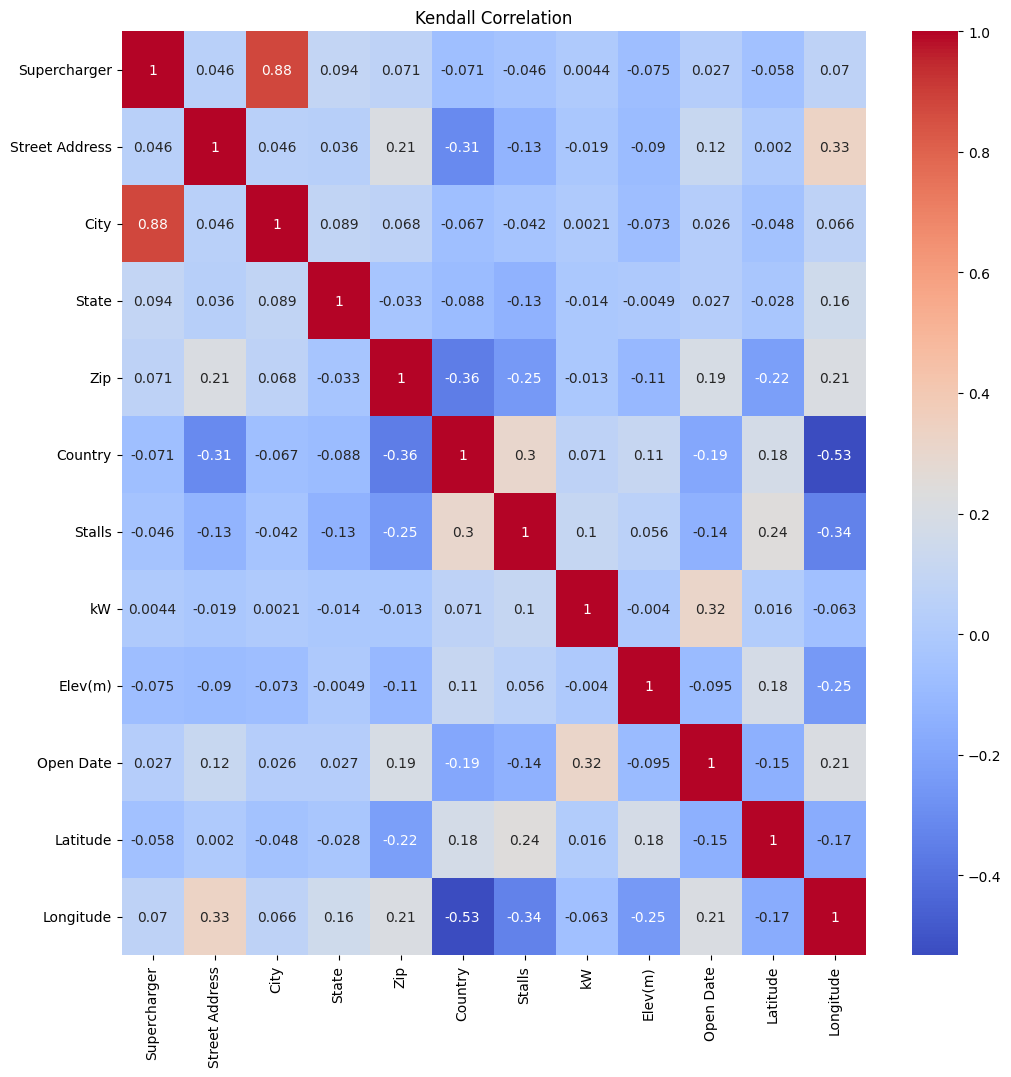

In [78]:

# Pearson Correlation
pearson_corr = supercharge_df.corr(method='pearson')
plt.figure(figsize=(12, 12))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation')
plt.show()

# Spearman Correlation
spearman_corr = supercharge_df.corr(method='spearman')
plt.figure(figsize=(12, 12))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm')
plt.title('Spearman Correlation')
plt.show()

# Kendall Correlation
kendall_corr = supercharge_df.corr(method='kendall')
plt.figure(figsize=(12, 12))
sns.heatmap(kendall_corr, annot=True, cmap='coolwarm')
plt.title('Kendall Correlation')
plt.show()


In [79]:
print(pearson_corr)

                Supercharger  Street Address      City     State       Zip  \
Supercharger        1.000000        0.068858  0.906386  0.127961  0.090931   
Street Address      0.068858        1.000000  0.064855  0.053174  0.255507   
City                0.906386        0.064855  1.000000  0.120207  0.082921   
State               0.127961        0.053174  0.120207  1.000000 -0.071300   
Zip                 0.090931        0.255507  0.082921 -0.071300  1.000000   
Country            -0.087856       -0.467639 -0.079697 -0.105760 -0.429566   
Stalls             -0.044052       -0.109050 -0.042832 -0.155377 -0.171234   
kW                  0.008836       -0.011385  0.005070 -0.010881  0.003557   
Elev(m)            -0.049144       -0.058015 -0.050682  0.049635  0.046086   
Open Date           0.022018        0.128853  0.018967  0.034268  0.098898   
Latitude           -0.039234        0.079651 -0.017789 -0.056372 -0.063995   
Longitude           0.106677        0.539657  0.095036  0.161377

Based on the correlation matrix provided, here are a few observations:

'Supercharger' and 'City' have a high positive correlation (0.906). This could suggest that specific Supercharger models are concentrated in certain cities.

'Street Address' and 'Longitude' have a high positive correlation (0.540). This may mean that different streets are related with distinct longitudes.

'Country' and 'Longitude' have a strong negative correlation (-0.754). This could be due to countries being spread across different longitudes.

'Country' and 'Stalls' have a significant positive correlation (0.261). This might indicate that the number of stalls might be higher in some countries compared to others.

'Zip' and 'Stalls' have a moderate negative correlation (-0.171), possibly implying that certain zip code areas have fewer Supercharger stalls.

'Country' and 'Street Address' show a strong negative correlation (-0.468), suggesting that specific street addresses are exclusive to certain countries.